## **DATA ANALYSIS OF BLINKIT SALES DATASET**

#### Import Libraries

In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df= pd.read_csv("BlinkIT Grocery Data.csv")
df.head(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [13]:
df.shape

(8523, 12)

In [14]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.643456,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,8.773750,93.826500,4.000000
50%,2016.000000,0.053931,12.600000,143.012800,4.000000
75%,2018.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [15]:
df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

In [16]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [17]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

#### Data cleaning

In [18]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [20]:
df['Item Fat Content']= df['Item Fat Content'].replace({'LF' : 'Low Fat',
                                                        'low fat': 'Low Fat',
                                                         'reg': 'Regular'}) 

In [21]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


#### **Business Requirements**

#### KPI requirements

In [22]:
#TotalSales
total_sales= df['Sales'].sum()

#AverageSales
avg_sales= df['Sales'].mean()

#No. of items Sold
no_of_items= df['Sales'].count()

#AvgRatings
avg_ratings= df['Rating'].mean()

In [23]:
#display

print(f"Total Sales: ${total_sales:,.0f}")
print(f"Average Sales: ${avg_sales:,.1f}")
print("No of item Sold:", no_of_items)
print(f"Average Rating: {avg_ratings:,.1f}")

Total Sales: $1,201,681
Average Sales: $141.0
No of item Sold: 8523
Average Rating: 4.0


### Charts Requirements

#### Total sales by Fat Content 

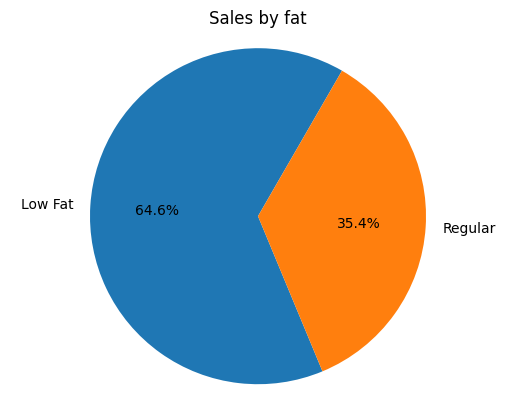

In [24]:
sales_by_fat= df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat, labels=sales_by_fat.index, autopct='%.1f%%', startangle= 60)
plt.title('Sales by fat')
plt.axis('equal')
plt.show()

#### Total sales by Item Type

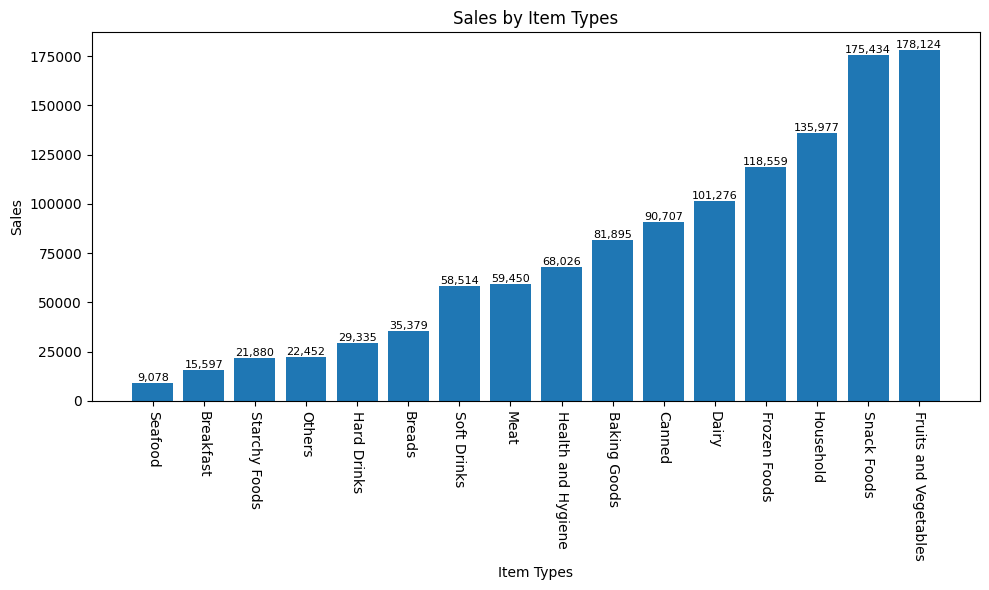

In [33]:

sales_by_ItemType= df.groupby('Item Type')['Sales'].sum().sort_values()

plt.figure(figsize=(10,6))
bars= plt.bar(sales_by_ItemType.index, sales_by_ItemType.values)
plt.xticks(rotation= -90)
plt.xlabel("Item Types")
plt.ylabel("Sales")
plt.title('Sales by Item Types')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
            f'{bar.get_height():,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

#### Fat Content by Outlet for Total Sales

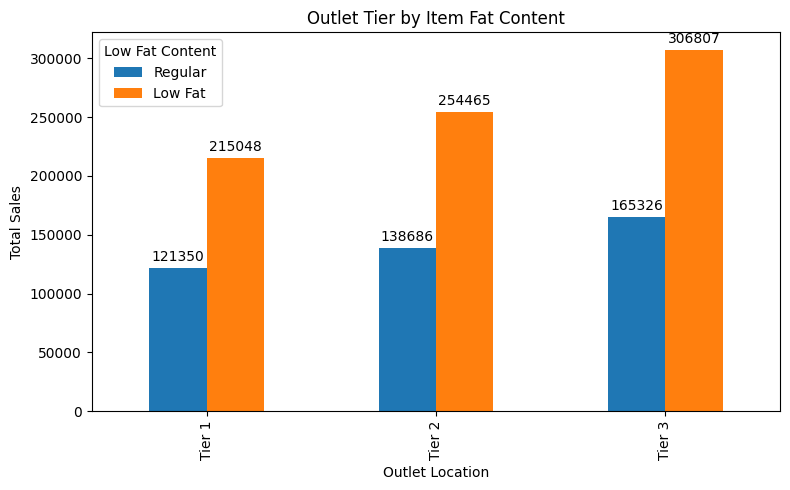

In [26]:
grouped= df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped= grouped[['Regular','Low Fat']]

ax= grouped.plot(kind='bar', figsize=(8,5), title= 'Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location')
plt.ylabel('Total Sales')
plt.legend(title='Low Fat Content')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

#### Total Sales by Outlet Establishment

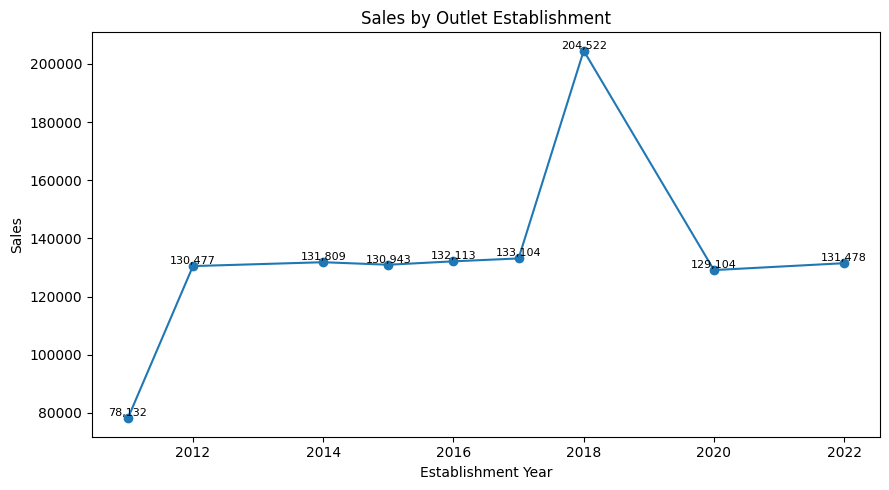

In [41]:
sales_by_Establishment= df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()
plt.figure(figsize=(9,5))
plt.plot(sales_by_Establishment.index, sales_by_Establishment.values, marker= 'o', linestyle='-')  
plt.xlabel("Establishment Year")
plt.ylabel("Sales")
plt.title('Sales by Outlet Establishment')
for x,y in zip(sales_by_Establishment.index, sales_by_Establishment.values):
    plt.text(x,y,f'{y:,.0f}', ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

#### Total Sales by Outlet Size

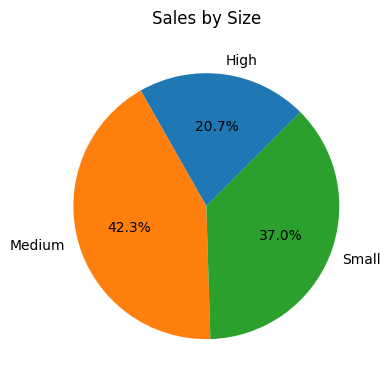

In [31]:
sales_by_size= df.groupby('Outlet Size')['Sales'].sum()
plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%.1f%%', startangle= 45)
plt.title('Sales by Size')
plt.axis('equal')
plt.tight_layout()
plt.show()

#### Sales by Outlet Locations

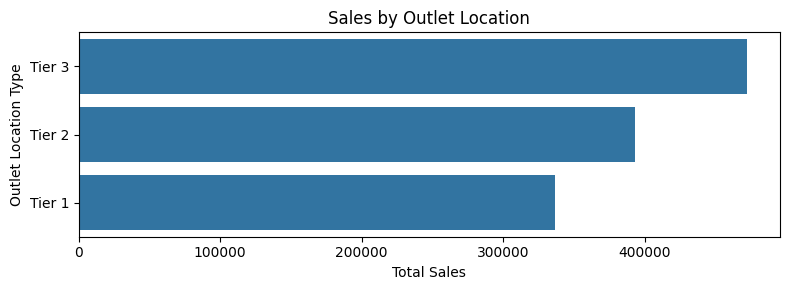

In [32]:
sales_by_location= df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location= sales_by_location.sort_values('Sales', ascending= False)

plt.figure(figsize=(8,3))
ax= sns.barplot(x='Sales', y='Outlet Location Type', data= sales_by_location)

plt.title('Sales by Outlet Location')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
plt.tight_layout()
plt.show()
